PIZZA SALES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

Import Raw Data

In [2]:
df = pd.read_excel("pizza_sales_excel_file.xlsx")

MetaData of Raw Data

In [3]:
df.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7,3,ital_supr_m,1,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8,3,prsc_argla_l,1,2015-01-01,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9,4,ital_supr_m,1,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10,5,ital_supr_m,1,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [4]:
df.tail(15)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48605,48606,21345,classic_dlx_s,1,2015-12-31,20:44:43,12.00,12.00,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
48606,48607,21345,spin_pesto_m,1,2015-12-31,20:44:43,16.50,16.50,M,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
48607,48608,21346,big_meat_s,1,2015-12-31,20:51:07,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
48608,48609,21346,cali_ckn_m,1,2015-12-31,20:51:07,16.75,16.75,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
48609,48610,21346,cali_ckn_s,1,2015-12-31,20:51:07,12.75,12.75,S,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
48610,48611,21346,soppressata_l,1,2015-12-31,20:51:07,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
48611,48612,21347,bbq_ckn_m,1,2015-12-31,21:14:37,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
48612,48613,21347,ital_supr_m,1,2015-12-31,21:14:37,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
48613,48614,21347,peppr_salami_s,1,2015-12-31,21:14:37,12.50,12.50,S,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
48614,48615,21347,southw_ckn_l,1,2015-12-31,21:14:37,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza


In [5]:
print("The Metadataset:",df.shape)

The Metadataset: (48620, 12)


In [6]:
print("The Rows of the dataset:",df.shape[0])

The Rows of the dataset: 48620


In [7]:
print("The Columns of the dataset:",df.shape[1])

The Columns of the dataset: 12


In [8]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_categor

Data Types in Raw Data

In [10]:
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [11]:
df.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


In [12]:
total_revenue = df['total_price'].sum()
total_pizzas_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()

avg_order_value = total_revenue / total_orders
avg_pizzas_per_order = total_pizzas_sold / total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold:,}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Average Pizzas per Order: {avg_pizzas_per_order:.2f}")

Total Revenue: $817,860.05
Total Pizzas Sold: 49,574
Total Orders: 21,350
Average Order Value: $38.31
Average Pizzas per Order: 2.32


Ingredient Analysis

In [13]:
ingredient = (
    df['pizza_ingredients']
        .str.split(',')
        .explode()
        .str.strip()
        .value_counts()
        .reset_index(name='counts')
        .rename(columns={'index': 'Ingredients'})
)

print(ingredient.head(15))


    pizza_ingredients  counts
0              Garlic   27422
1            Tomatoes   26601
2          Red Onions   19547
3         Red Peppers   16284
4   Mozzarella Cheese   10333
5           Pepperoni   10300
6             Spinach   10012
7           Mushrooms    9624
8             Chicken    8443
9           Capocollo    6572
10       Green Olives    6174
11         Artichokes    5682
12   Jalapeno Peppers    5643
13      Green Peppers    5224
14        Feta Cheese    4748


Daily Trend - Total Orders

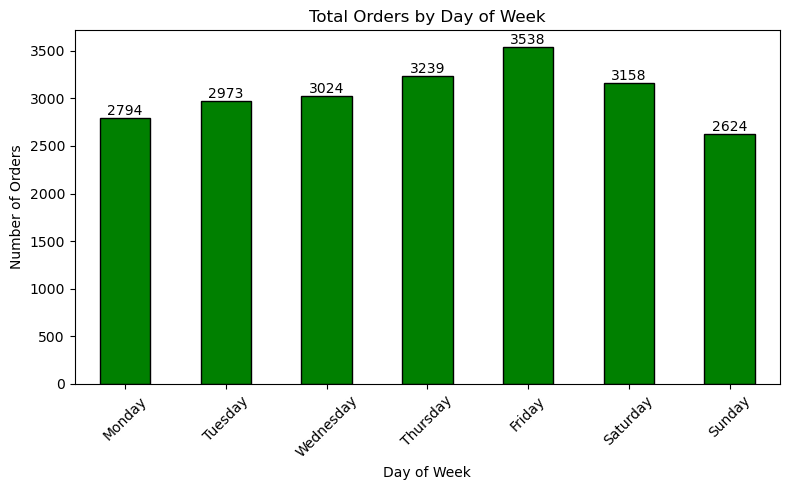

In [14]:
import matplotlib.pyplot as plt

# Convert to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract day name
df['day_name'] = df['order_date'].dt.day_name()

# Correct weekday order (capitalized)
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

# Convert to ordered categorical
df['day_name'] = pd.Categorical(
    df['day_name'],
    categories=weekday_order,
    ordered=True
)

# Calculate unique orders per day
orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

# Plot
ax = orders_by_day.plot(
    kind='bar',
    figsize=(8,5),
    color='green',
    edgecolor='black'
)

plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

# Add value labels on bars
for i, val in enumerate(orders_by_day):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()


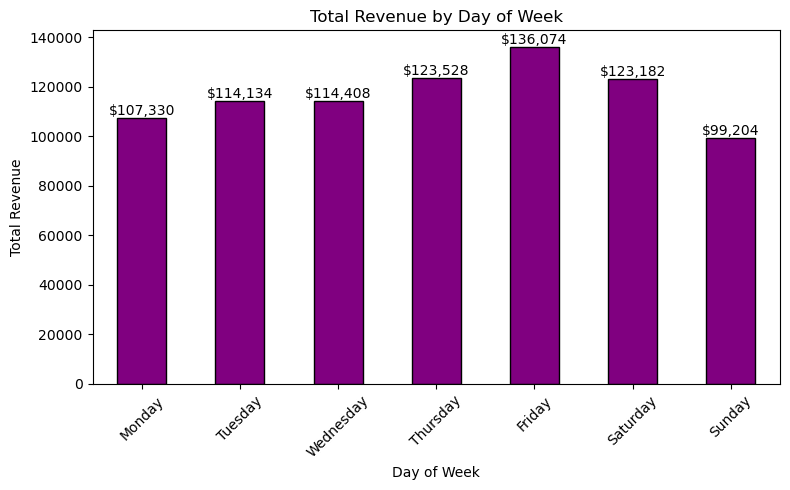

In [15]:
import matplotlib.pyplot as plt

# Convert to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract day name
df['day_name'] = df['order_date'].dt.day_name()

# Correct weekday order
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

df['day_name'] = pd.Categorical(
    df['day_name'],
    categories=weekday_order,
    ordered=True
)

# Calculate total revenue per day
orders_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

# Plot
ax = orders_by_day.plot(
    kind='bar',
    figsize=(8,5),
    color='purple',   # fixed here
    edgecolor='black'
)

plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

# Add formatted revenue labels
for i, val in enumerate(orders_by_day):
    plt.text(i, val, f"${val:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


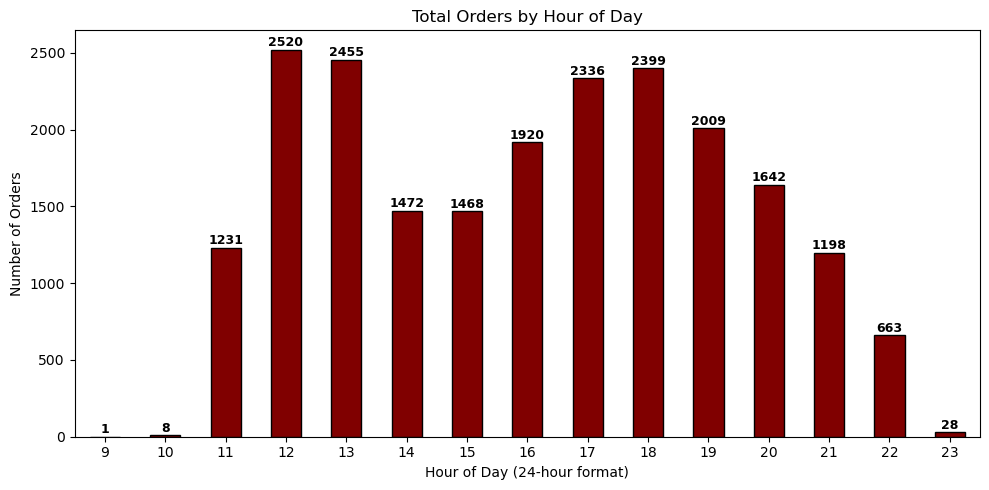

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to datetime
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# Extract hour
df['order_hour'] = df['order_time'].dt.hour

# Count unique orders per hour
orders_by_hour = df.groupby('order_hour')['order_id'].nunique()

# Plot
ax = orders_by_hour.plot(
    kind='bar',
    figsize=(10,5),
    color='maroon',
    edgecolor='black'
)

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-hour format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

# Add labels on top of bars
for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 2, str(val), ha='center',va='bottom',fontsize=9, fontweight='bold')  # small offset for visibility

plt.tight_layout()
plt.show()


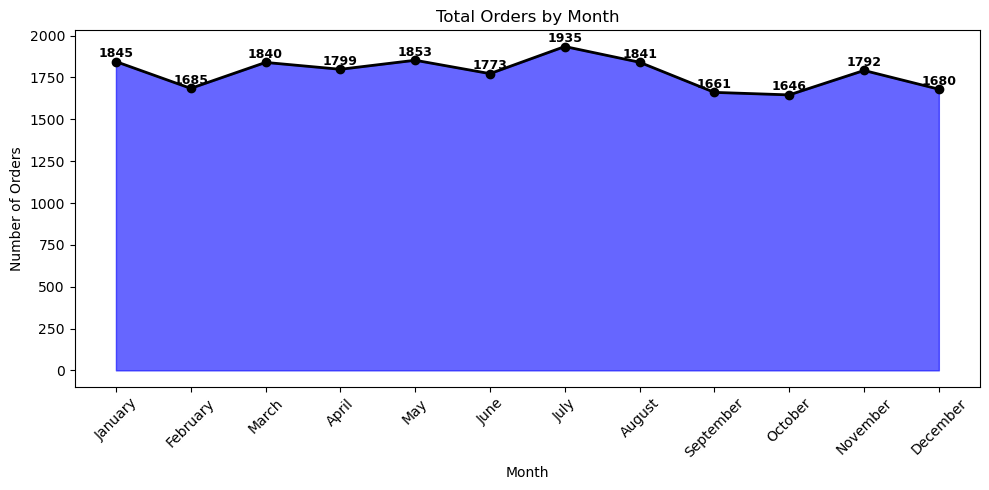

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract month name
df['month_name'] = df['order_date'].dt.month_name()

# Correct month order (capitalized)
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Convert to ordered categorical
df['month_name'] = pd.Categorical(
    df['month_name'],
    categories=month_order,
    ordered=True
)

# Count unique orders per month
orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()

# Plot
plt.figure(figsize=(10,5))

plt.fill_between(
    range(len(orders_by_month)),
    orders_by_month.values,
    color="blue",
    alpha=0.6
)

plt.plot(
    range(len(orders_by_month)),
    orders_by_month.values,
    color="black",
    linewidth=2,
    marker="o"
)

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(range(len(orders_by_month)), orders_by_month.index, rotation=45)

# Add value labels
for i, val in enumerate(orders_by_month):
    plt.text(i, val + 10, str(val),
             ha="center", va="bottom",
             fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


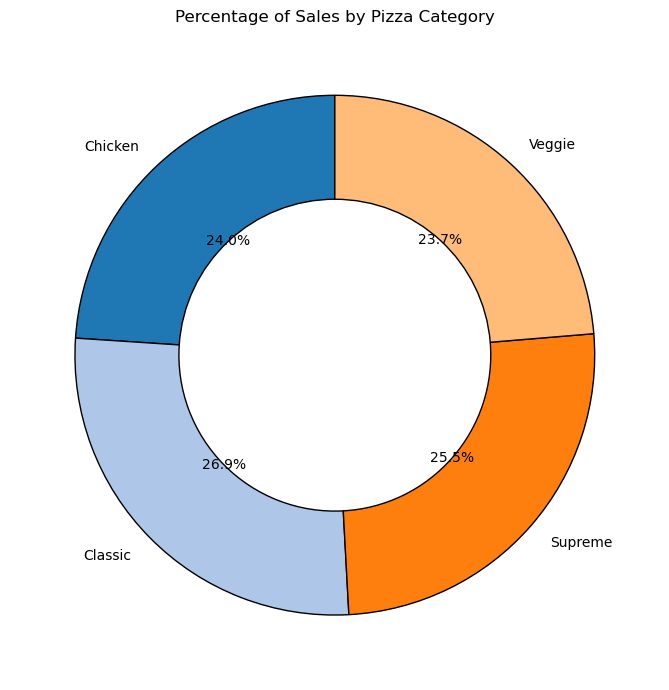

In [18]:
import matplotlib.pyplot as plt

# Total sales by category
category_sales = df.groupby("pizza_category")["total_price"].sum()

# Percentage calculation
category_pct = (category_sales / category_sales.sum()) * 100

plt.figure(figsize=(7,7))

colors = plt.get_cmap('tab20').colors

plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={
        'edgecolor': 'black',
        'width': 0.4   # makes it a donut chart
    }
)

plt.title("Percentage of Sales by Pizza Category")

plt.tight_layout()
plt.show()


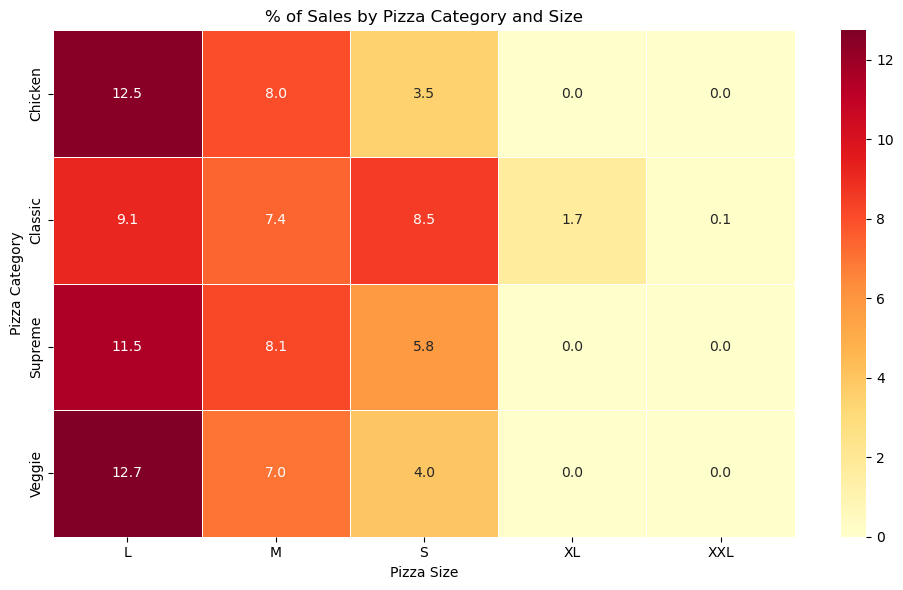

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pivot table
sales_pivot = df.pivot_table(
    index="pizza_category",
    columns="pizza_size",
    values="total_price",
    aggfunc="sum",
    fill_value=0
)

# Convert to percentage of total sales
sales_pct = (sales_pivot / sales_pivot.sum().sum()) * 100

# Plot heatmap
plt.figure(figsize=(10,6))

sns.heatmap(
    sales_pct,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("% of Sales by Pizza Category and Size")
plt.ylabel("Pizza Category")
plt.xlabel("Pizza Size")

plt.tight_layout()
plt.show()


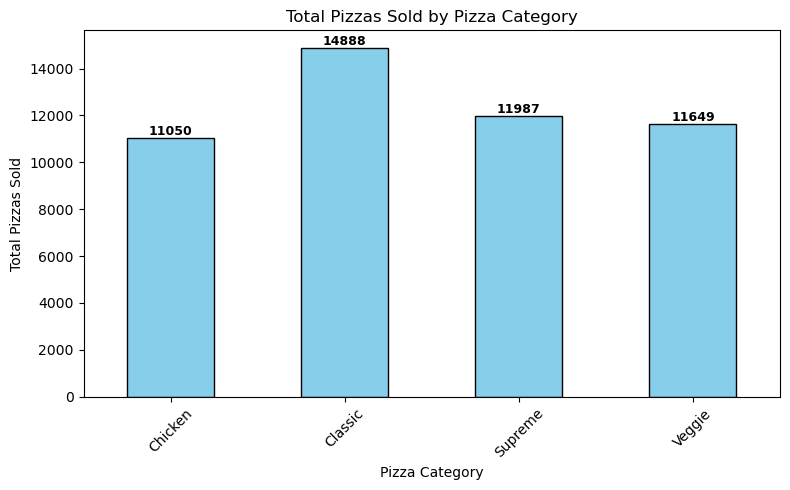

In [20]:
# Group and sum quantity
pizzas_by_category = df.groupby("pizza_category")['quantity'].sum()

# Plot
ax = pizzas_by_category.plot( kind='bar',figsize=(8,5), color='skyblue', edgecolor='black')

plt.title("Total Pizzas Sold by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

# Add value labels
for i, val in enumerate(pizzas_by_category):
    plt.text(i, val + 5, str(val), ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


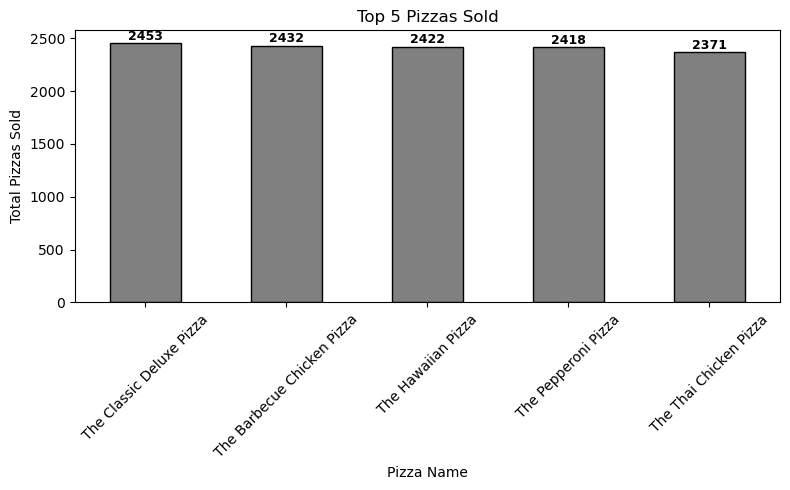

In [21]:
import matplotlib.pyplot as plt

# Group by pizza name and sum quantity
pizzas_by_name = df.groupby("pizza_name")["quantity"].sum()

# Get top 5
top5 = pizzas_by_name.sort_values(ascending=False).head(5)

# Plot
ax = top5.plot(
    kind="bar",
    figsize=(8,5),
    color="grey",
    edgecolor="black"
)

plt.title("Top 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

# Add value labels
for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val),
             ha="center", va="bottom",
             fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


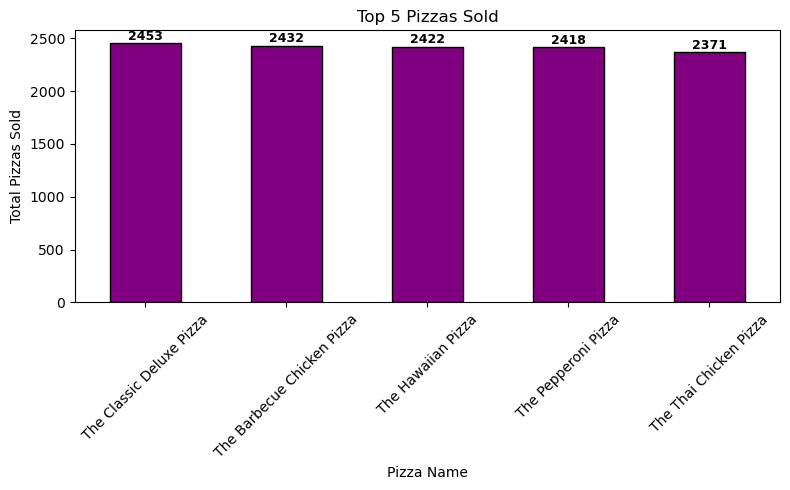

In [22]:
import matplotlib.pyplot as plt

# Group by pizza name and sum quantity
pizzas_by_name = df.groupby("pizza_name")["quantity"].sum()

# Get top 5
top5 = pizzas_by_name.sort_values(ascending=False).head(5)

# Plot
ax = top5.plot(
    kind="bar",
    figsize=(8,5),
    color="purple",
    edgecolor="black"
)

plt.title("Top 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

# Add value labels
for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val),
             ha="center", va="bottom",
             fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


Top 5 Best-Selling Pizzas - Total Sales

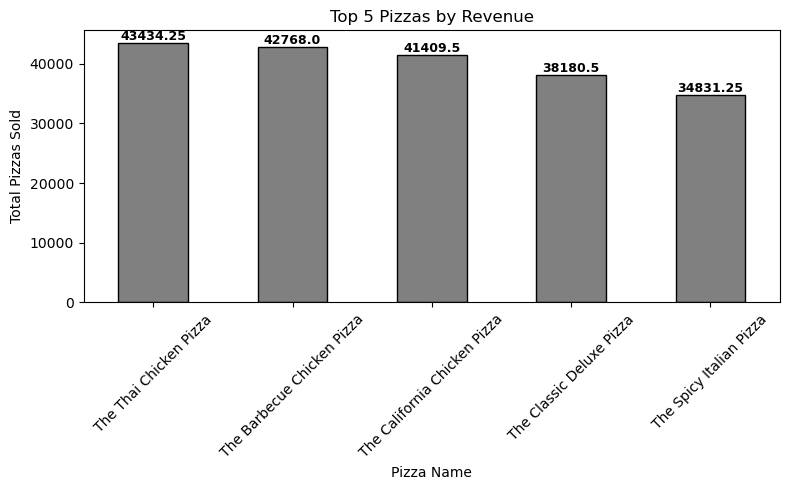

In [23]:
import matplotlib.pyplot as plt

# Group by pizza name and sum quantity
pizzas_by_name = df.groupby("pizza_name")["total_price"].sum()

# Get top 5
top5 = pizzas_by_name.sort_values(ascending=False).head(5)

# Plot
ax = top5.plot(
    kind="bar",
    figsize=(8,5),
    color="grey",
    edgecolor="black"
)

plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

# Add value labels
for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val),
             ha="center", va="bottom",
             fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


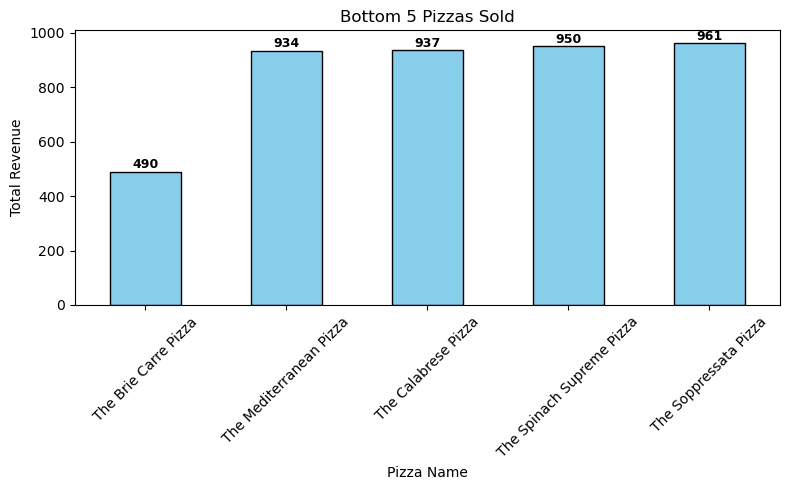

In [24]:
import matplotlib.pyplot as plt

# Group by pizza name and sum quantity
pizzas_by_name = df.groupby("pizza_name")["quantity"].sum()

# Get bottom 5
bottom5 = pizzas_by_name.sort_values(ascending=True).head(5)

# Plot
ax = bottom5.plot(
    kind='bar',
    figsize=(8,5),
    color='skyblue',
    edgecolor='black'
)

plt.title("Bottom 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

# Add value labels
for i, val in enumerate(bottom5):
    plt.text(i, val + 1, str(val),
             ha="center", va="bottom",
             fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()
